In [ ]:
#meta: 6/9/2022
#book: Machine Learning for Time Series Forecasting with Python  
#author: Francesca Lazzeri, PhD.  
#forked from FrancescaLazzeri https://github.com/FrancescaLazzeri/Machine-Learning-for-Time-Series-Forecasting  

#infra: myLaptop MBPro
#python 3.8.3 
#default env: numpy 1.18.5, pandas 1.0.5, matplotlib 3.2.2

#history
#6/9/2022 DATA SETUP
#      my work through code is marked with `$my`

In [31]:
#python version $my
import sys
print(sys.version)

3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]


# Data Setup

In this notebook, we demonstrate how to setup time series data for the examples inlcuded in this book. The data in this example is taken from the GEFCom2014 forecasting competition<sup>1</sup> (see reference below). It consists of 3 years of hourly electricity load and temperature values between 2012 and 2014. 

<sup>1</sup>Tao Hong, Pierre Pinson, Shu Fan, Hamidreza Zareipour, Alberto Troccoli and Rob J. Hyndman, "Probabilistic energy forecasting: Global Energy Forecasting Competition 2014 and beyond", International Journal of Forecasting, vol.32, no.3, pp 896-913, July-September, 2016.

In [1]:
import os
import shutil
import matplotlib.pyplot as plt
from common.utils import load_data, extract_data, download_file
%matplotlib inline

In [2]:
data_dir = './data'

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

if not os.path.exists(os.path.join(data_dir, 'energy.csv')):
    download_file("https://mlftsfwp.blob.core.windows.net/mlftsfwp/GEFCom2014.zip")
    shutil.move("GEFCom2014.zip", os.path.join(data_dir,"GEFCom2014.zip"))
    extract_data(data_dir)

In [13]:
ts_data_load = load_data(data_dir)[['load']] #class pandas.core.frame.DataFrame
print(ts_data_load.shape)
print('Index type: ', ts_data_load.index.dtype, ts_data_load.index.__class__)
print(ts_data_load.dtypes)

#preview
ts_data_load.head()

(26304, 1)
Index type:  datetime64[ns] <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
load    float64
dtype: object


,load
2012-01-01 00:00:00,2698.0
2012-01-01 01:00:00,2558.0
2012-01-01 02:00:00,2444.0
2012-01-01 03:00:00,2402.0
2012-01-01 04:00:00,2403.0


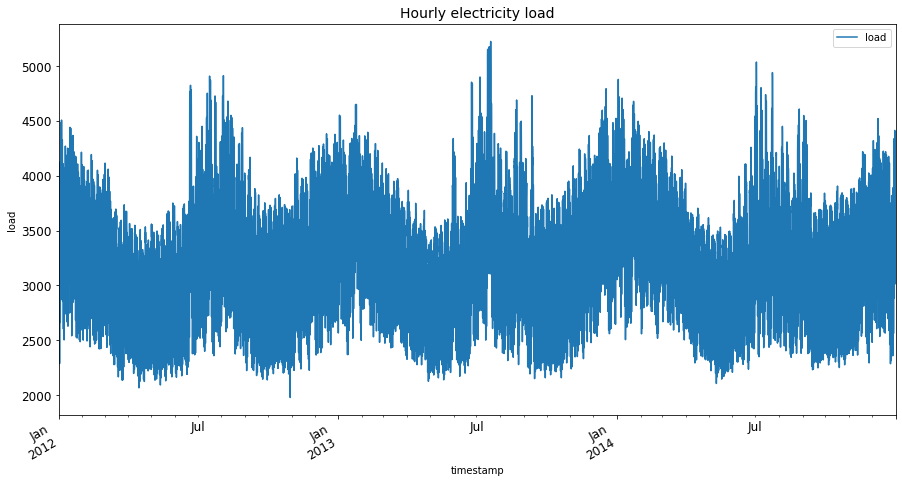

In [19]:
ts_data_load.plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.title('Hourly electricity load', fontsize=14)
plt.xlabel('timestamp')
plt.ylabel('load')
plt.show()

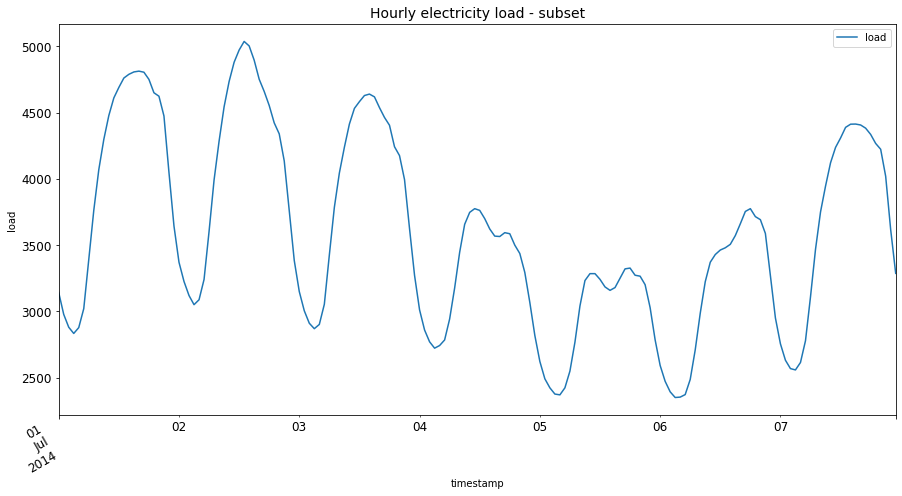

In [20]:
ts_data_load['2014-07-01':'2014-07-07'].plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.title('Hourly electricity load - subset', fontsize=14)
plt.xlabel('timestamp')
plt.ylabel('load')
plt.show()